## PCA
We want to look at how PCA can be done for a dataset and used for visualization. We have sevaral goals to work onto:
- Get started with using CSV and DataFrames to manipulate datasets
- Look at how PCA can be done using simple LinearAlgebra and StatsBase utilities
- Experiment with the Power method for PCA


In [1]:
# import Pkg; Pkg.add("Plots")

In [2]:
using CSV, DataFrames, Plots

*If on a local Jupyter installation the above line doesn't work straight away, install those the packages and try again.

We then load in the [UCI wine data](https://archive.ics.uci.edu/ml/datasets/wine). The purpose of this dataset is to build a predictive model for wine classification based on 13 attributes (quantity of 13 constituents found in the wine). For now, let's try visualizing the data. We load in the data first, getting a DataFrame: 

In [3]:
df = CSV.read("wine-uci.csv", DataFrame)

Row,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
,Int64,Float64,Float64,Float64,Float64,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Int64
1,1,14.23,1.71,2.43,15.6,127,2.8,3.06,0.28,2.29,5.64,1.04,3.92,1065
2,1,13.2,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.4,1050
3,1,13.16,2.36,2.67,18.6,101,2.8,3.24,0.3,2.81,5.68,1.03,3.17,1185
4,1,14.37,1.95,2.5,16.8,113,3.85,3.49,0.24,2.18,7.8,0.86,3.45,1480
5,1,13.24,2.59,2.87,21.0,118,2.8,2.69,0.39,1.82,4.32,1.04,2.93,735
6,1,14.2,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
7,1,14.39,1.87,2.45,14.6,96,2.5,2.52,0.3,1.98,5.25,1.02,3.58,1290
8,1,14.06,2.15,2.61,17.6,121,2.6,2.51,0.31,1.25,5.05,1.06,3.58,1295
9,1,14.83,1.64,2.17,14.0,97,2.8,2.98,0.29,1.98,5.2,1.08,2.85,1045


We can get the complete list of attribute names: 

In [4]:
names(df)

14-element Vector{String}:
 "Wine"
 "Alcohol"
 "Malic.acid"
 "Ash"
 "Acl"
 "Mg"
 "Phenols"
 "Flavanoids"
 "Nonflavanoid.phenols"
 "Proanth"
 "Color.int"
 "Hue"
 "OD"
 "Proline"

The first column of the DataFrame is the "Wine" class labels used for prediction training. We can extract it now and use it later for "labelling" the data points in scatter plots. Note "y" has become a vector:

In [5]:
y = df[:, 1]

178-element Vector{Int64}:
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 ⋮
 3
 3
 3
 3
 3
 3
 3
 3
 3
 3
 3
 3

**Task 1**: Find out the unique "y" values and generate the counts for each (i.e, find out how many instances each class of "Wine" has). 

Here are three different solutions. Pick your favourite. 

In [6]:
# code for Task 1, version 1 using StatsBase
using StatsBase
countmap(y)  # can also use counts(.)

Dict{Int64, Int64} with 3 entries:
  2 => 71
  3 => 48
  1 => 59

In [7]:
# solution version 2 using count/unique and tuples
[(k, count(y .== k)) for k in unique(y)]

3-element Vector{Tuple{Int64, Int64}}:
 (1, 59)
 (2, 71)
 (3, 48)

In [8]:
# solution version 3 using DataFrame utilities
combine(groupby(df, [:Wine]), nrow => :count)

Row,Wine,count
,Int64,Int64
1,1,59
2,2,71
3,3,48


We can select multiple attributes from the DataFrame. Note the outcome will remain a DataFrame: 

In [9]:
df[:, ["Alcohol","Ash"]]   # Choose multiple attributes. Equivalent to using integer indeces, i.e., df[:, [2, 4]]

Row,Alcohol,Ash
,Float64,Float64
1,14.23,2.43
2,13.2,2.14
3,13.16,2.67
4,14.37,2.5
5,13.24,2.87
6,14.2,2.45
7,14.39,2.45
8,14.06,2.61
9,14.83,2.17


We can access each field of the DataFrame, using the ".attribute" form: 

In [10]:
df.Ash

178-element Vector{Float64}:
 2.43
 2.14
 2.67
 2.5
 2.87
 2.45
 2.45
 2.61
 2.17
 2.27
 2.3
 2.32
 2.41
 ⋮
 2.6
 2.3
 2.69
 2.86
 2.32
 2.28
 2.48
 2.45
 2.48
 2.26
 2.37
 2.74

We can do even a bit of SQL-like query. E.g., we can extract all the data lines with Ash values greater than 2.5 - note the use of "." broadcast for comparison operators: 

In [11]:
df[df.Ash .> 2.5, :]

Row,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
,Int64,Float64,Float64,Float64,Float64,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Int64
1,1,13.16,2.36,2.67,18.6,101,2.8,3.24,0.3,2.81,5.68,1.03,3.17,1185
2,1,13.24,2.59,2.87,21.0,118,2.8,2.69,0.39,1.82,4.32,1.04,2.93,735
3,1,14.06,2.15,2.61,17.6,121,2.6,2.51,0.31,1.25,5.05,1.06,3.58,1295
4,1,13.63,1.81,2.7,17.2,112,2.85,2.91,0.3,1.46,7.3,1.28,2.88,1310
5,1,14.3,1.92,2.72,20.0,120,2.8,3.14,0.33,1.97,6.2,1.07,2.65,1280
6,1,13.83,1.57,2.62,20.0,115,2.95,3.4,0.4,1.72,6.6,1.13,2.57,1130
7,1,13.64,3.1,2.56,15.2,116,2.7,3.03,0.17,1.66,5.1,0.96,3.36,845
8,1,12.93,3.8,2.65,18.6,102,2.41,2.41,0.25,1.98,4.5,1.03,3.52,770
9,1,12.85,1.6,2.52,17.8,95,2.48,2.37,0.26,1.46,3.93,1.09,3.63,1015


**Task 2**: Extract data lines with "Ash" greater than 2.5, and "Mg" smaller than 90.0. 

In [12]:
df[(df.Ash .> 2.5) .& (df.Mg .< 90.0), :]

Row,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
,Int64,Float64,Float64,Float64,Float64,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Int64
1,2,13.86,1.51,2.67,25.0,86,2.95,2.86,0.21,1.87,3.38,1.36,3.16,410
2,2,12.08,1.13,2.51,24.0,78,2.0,1.58,0.4,1.4,2.2,1.31,2.72,630
3,2,11.65,1.67,2.62,26.0,88,1.92,1.61,0.4,1.34,2.6,1.36,3.21,562
4,3,12.25,4.72,2.54,21.0,89,1.38,0.47,0.53,0.8,3.85,0.75,1.27,720
5,3,13.48,1.67,2.64,22.5,89,2.6,1.1,0.52,2.29,11.75,0.57,1.78,620


In [13]:
# another solution
df1 = df[df.Ash .> 2.5, :]
df1[df1.Mg .< 90.0, :]

Row,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
,Int64,Float64,Float64,Float64,Float64,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Int64
1,2,13.86,1.51,2.67,25.0,86,2.95,2.86,0.21,1.87,3.38,1.36,3.16,410
2,2,12.08,1.13,2.51,24.0,78,2.0,1.58,0.4,1.4,2.2,1.31,2.72,630
3,2,11.65,1.67,2.62,26.0,88,1.92,1.61,0.4,1.34,2.6,1.36,3.21,562
4,3,12.25,4.72,2.54,21.0,89,1.38,0.47,0.53,0.8,3.85,0.75,1.27,720
5,3,13.48,1.67,2.64,22.5,89,2.6,1.1,0.52,2.29,11.75,0.57,1.78,620


So much for getting started with DataFrames. We now focus on our main task - PCA. 
It is time for us to extract the data from the DataFrame as a matrix, from the 2nd attribute to the last. 

Note that we need to **transpose** the data so that it is *Julia-styled, one data instance per column:* 

In [14]:
data = Matrix(df)[:, 2:end]
X = data'

13×178 adjoint(::Matrix{Float64}) with eltype Float64:
   14.23    13.2     13.16    14.37  …   13.4    13.27   13.17   14.13
    1.71     1.78     2.36     1.95       3.91    4.28    2.59    4.1
    2.43     2.14     2.67     2.5        2.48    2.26    2.37    2.74
   15.6     11.2     18.6     16.8       23.0    20.0    20.0    24.5
  127.0    100.0    101.0    113.0      102.0   120.0   120.0    96.0
    2.8      2.65     2.8      3.85  …    1.8     1.59    1.65    2.05
    3.06     2.76     3.24     3.49       0.75    0.69    0.68    0.76
    0.28     0.26     0.3      0.24       0.43    0.43    0.53    0.56
    2.29     1.28     2.81     2.18       1.41    1.35    1.46    1.35
    5.64     4.38     5.68     7.8        7.3    10.2     9.3     9.2
    1.04     1.05     1.03     0.86  …    0.7     0.59    0.6     0.61
    3.92     3.4      3.17     3.45       1.56    1.56    1.62    1.6
 1065.0   1050.0   1185.0   1480.0      750.0   835.0   840.0   560.0

Now we calculate the mean vector and the covairance matrix: 

In [15]:
# import Pkg; Pkg.add("StatsBase")

In [16]:
using Statistics, StatsBase, LinearAlgebra

In [17]:
m = mean(X, dims=2)   # get the mean vector
R = (X .- m)*(X .- m)'/size(X)[2]   # make the data zero-meaned, then get the covariance matrix

13×13 Matrix{Float64}:
   0.65536      0.0851303   0.0468505    …   0.0414636      163.643
   0.0851303    1.241       0.0499946       -0.290805       -67.1694
   0.0468505    0.0499946   0.0748418        0.000757556     19.2112
  -0.836368     1.07028     0.403926        -0.652548      -460.752
   3.12224     -0.865888    1.11663          0.665548      1759.22
   0.146062    -0.233021    0.0220212    …   0.309274        97.6195
   0.190954    -0.456054    0.0313576        0.555126       154.574
  -0.0156658    0.0405045   0.00632275      -0.0442194      -12.135
   0.0631607   -0.140354    0.00150706       0.209748        59.2198
   1.02251      0.641215    0.163729        -0.701847       229.471
  -0.0132386   -0.14252    -0.00465585   …   0.0912507       16.9047
   0.0414636   -0.290805    0.000757556      0.501254        69.5347
 163.643      -67.1694     19.2112          69.5347       98609.6

Now we do PCA: get the eigenvalues and the corresponding eigenvectors (thanks to LinearAlgebra):

In [18]:
eigvals(R)   # note the eigenvalues are in increasing order: last being largest

13-element Vector{Float64}:
     0.008157614921878175
     0.02095398206988186
     0.037364877861326834
     0.07129977954884306
     0.11146700763215826
     0.15053080983036893
     0.27740625608253533
     0.8363387915368979
     1.2219416034929402
     4.963138278385493
     9.385090592776983
   171.5659672280158
 98644.47609322543

In [19]:
evecs = eigvecs(R)  # get eigenvectors; each column gives an eigenvector

13×13 Matrix{Float64}:
 -0.00802925   0.0156514    -0.0149715    …  -0.00120341    0.00165926
  0.0110904   -0.0672955    -0.0231877       -0.00215498   -0.000681016
  0.173686     0.132063      0.954011        -0.00459369    0.000194906
 -0.00193956  -0.00539381   -0.0528217       -0.0264504    -0.0046713
 -0.00228454  -0.000620888  -0.00302489      -0.999344      0.017868
  0.0266914   -0.0038829     0.00880161   …  -0.000877962   0.00098983
 -0.0695985    0.037488     -0.133205         5.18507e-5    0.00156729
 -0.966466    -0.147552      0.199179         0.00135448   -0.000123087
  0.0176036    0.0131188     0.135621        -0.0050044     0.000600608
  0.00463294  -0.0503556    -0.00981967      -0.0151004     0.00232714
  0.166551    -0.975562      0.0975107    …   0.000762673   0.00017138
 -0.0441922   -0.0116303     0.0284851        0.00349536    0.000704932
 -3.6267e-5    9.99995e-5   -0.000240452      0.0177738     0.999823

Now we can take the last two columns (actually the 2nd and 1st eigenvectors with the largest eigenvalues) to produce 2-D projections:

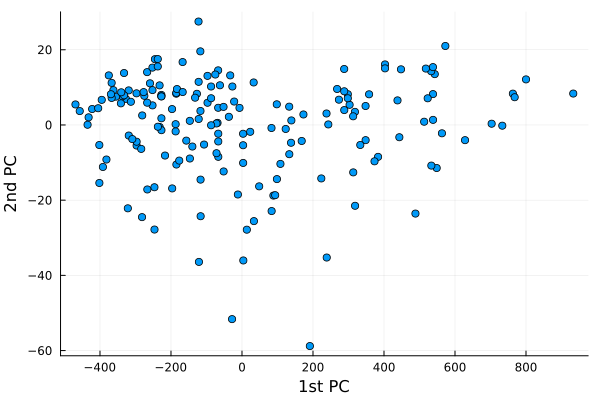

In [20]:
proj = evecs[:, end-1:end]' * (X .- m)
scatter(proj[2,:], proj[1,:], label="", xlabel="1st PC", ylabel="2nd PC")

In [21]:
reverse!(evecs, dims=2)   # reverse the order of eigenvectors: now they go from 1st to last with eigenvalues in decreasing order

13×13 Matrix{Float64}:
  0.00165926   -0.00120341    0.0168738   …   0.0156514    -0.00802925
 -0.000681016  -0.00215498    0.122003       -0.0672955     0.0110904
  0.000194906  -0.00459369    0.0519874       0.132063      0.173686
 -0.0046713    -0.0264504     0.938593       -0.00539381   -0.00193956
  0.017868     -0.999344     -0.0297802      -0.000620888  -0.00228454
  0.00098983   -0.000877962  -0.0404846   …  -0.0038829     0.0266914
  0.00156729    5.18507e-5   -0.0854433       0.037488     -0.0695985
 -0.000123087   0.00135448    0.0135108      -0.147552     -0.966466
  0.000600608  -0.0050044    -0.0246594       0.0131188     0.0176036
  0.00232714   -0.0151004     0.291398       -0.0503556     0.00463294
  0.00017138    0.000762673  -0.0259777   …  -0.975562      0.166551
  0.000704932   0.00349536   -0.070324       -0.0116303    -0.0441922
  0.999823      0.0177738     0.00452868      9.99995e-5   -3.6267e-5

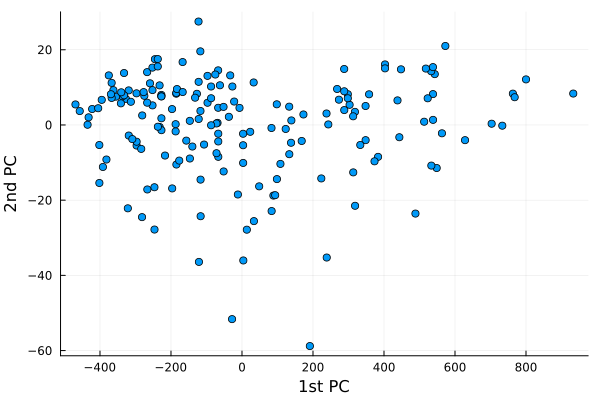

In [22]:
proj = evecs[:, 1:2]' * (X .- m)
scatter(proj[1,:], proj[2,:], label="", xlabel="1st PC", ylabel="2nd PC")

**Task 3**: The plot above does not tell us how well samples of different classes get separated after PCA. Redo the scatter plot and show data points of differnt classes with different markers. (Refer to Lab 3.)

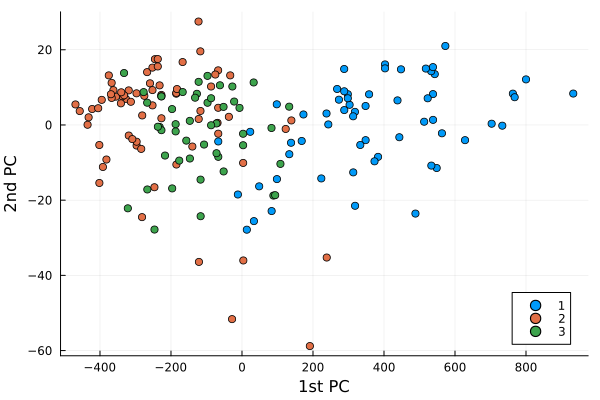

In [23]:
proj = evecs[:, 1:2]' * (X .- m)   
p = plot()
all_labels = unique(y)
for lb in all_labels
    subset = y .== lb
    p = scatter!(proj[1, subset], proj[2, subset], label=string(lb), xlabel="1st PC", ylabel="2nd PC")
end
p

A simpler approach, is to use the "group" option in Plots.jl, which does the colouring automatically: 

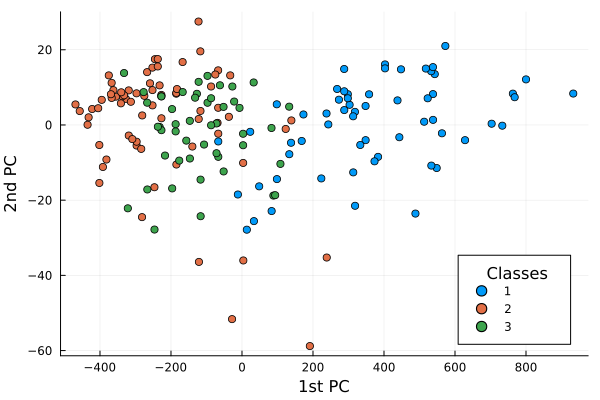

In [24]:
scatter(proj[1,:], proj[2,:], group = y, legendtitle="Classes", legend=:bottomright, xlabel="1st PC", ylabel="2nd PC")

**Comments**: The PCA visualization does not show good separability between the three classes. 

**Standardization**. Looking back on our data matrix, we can see that the attributes are of diverse numerical ranges - especially for the last attribute! It is hence necessary to *standardize* our data, making the distribution of each attribute to be of standard Gaussian, $N(0,1)$. We can use StatsBase's ZScoreTransform for data standardization:

In [25]:
X1 = standardize(ZScoreTransform, X, dims=2)

13×178 Matrix{Float64}:
  1.51434    0.245597   0.196325   …   0.331822   0.208643    1.39116
 -0.560668  -0.498009   0.0211715      1.73984    0.227053    1.57871
  0.2314    -0.825667   1.10621       -0.38826    0.0126963   1.36137
 -1.1663    -2.48384   -0.267982       0.151234   0.151234    1.49872
  1.90852    0.018094   0.0881098      1.41841    1.41841    -0.261969
  0.806722   0.567048   0.806722   …  -1.12665   -1.03078    -0.391646
  1.03191    0.731565   1.21211       -1.3408    -1.35081    -1.27072
 -0.657708  -0.818411  -0.497005       0.547563   1.35108     1.59213
  1.22144   -0.543189   2.12996       -0.420888  -0.228701   -0.420888
  0.251009  -0.292496   0.268263       2.21798    1.82976     1.78663
  0.361158   0.404908   0.317409   …  -1.60759   -1.56384    -1.52009
  1.84272    1.11032    0.786369      -1.48127   -1.39676    -1.42493
  1.01016    0.962526   1.39122        0.279786   0.295664   -0.593486

**Task 4**: Redo the PCA for the new data X1, and generate the scatter plot using the 1st and 2nd PCs. Comment on the difference. 

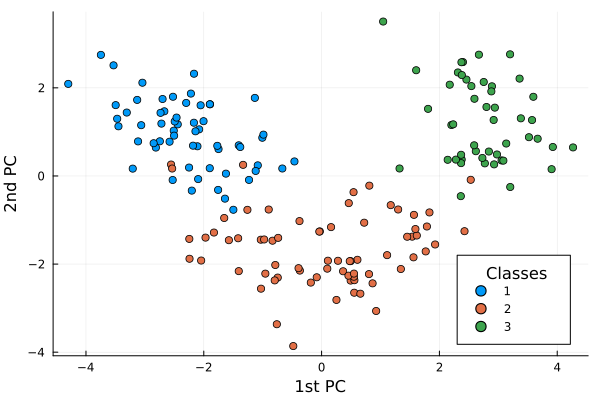

In [26]:
using LinearAlgebra
m1 = mean(X1, dims=2)
R = (X1.-m1) * (X1.-m1)'/size(X1)[2]
evecs = eigvecs(R)  # get the corresponding eigenvectors (as column vectors); the last being the "first" eigenvector e1
reverse!(evecs, dims=2)
proj = evecs[:, 1:2]' * X1  # generate projections
# now plot them out
scatter(proj[1,:], proj[2,:], group = y, legendtitle="Classes", legend=:bottomright, xlabel="1st PC", ylabel="2nd PC")

**Comments**: With the standardized data, PCA transform manages to show better separability for samples of different classes. This is because "variance" in the data is not misinformed by significant difference of value scales across attributes, but reflect how their values *vary* within the same value range. 

**Task 5**. Generate the scree plot of the eigenvalues. Use reverse() to reverse the order of the eigenvalue vector; better show the eigenvalues in percentage (of 100% total). Same as run-chart. 

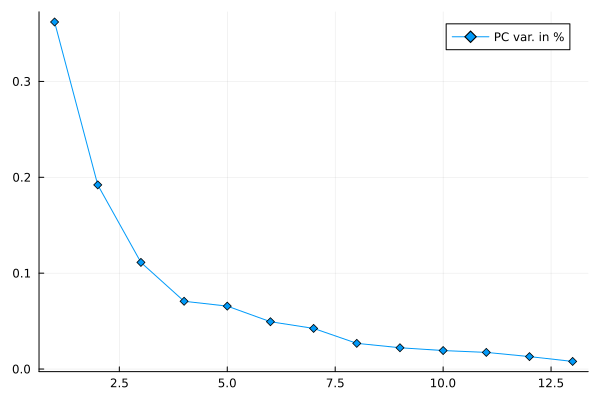

In [27]:
plot(1:13, reverse(eigvals(R)) / sum(eigvals(R)), marker=:d, label="PC var. in %")

**Extra:** we can look at the composition of the first eigenvector: it is in fact a linear combination of multiple attributes, with "Phenols", "Flavanoids", and "OD", among others, given some significant weights. 

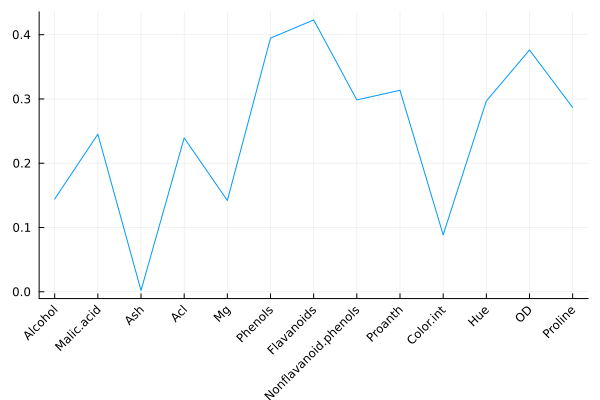

In [28]:
plot(names(df)[2:end], abs.(evecs[:,1]), xrotation=45, xlabel="Attributes", label="")

### Power method
Now we attempt PCA using the Power method. First, generate a random vector w:

In [29]:
using Random
Random.seed!(1)
w = rand(13)

13-element Vector{Float64}:
 0.23603334566204692
 0.34651701419196046
 0.3127069683360675
 0.00790928339056074
 0.4886128300795012
 0.21096820215853596
 0.951916339835734
 0.9999046588986136
 0.25166218303197185
 0.9866663668987996
 0.5557510873245723
 0.43710797460962514
 0.42471785049513144

Now we can do a few rounds of iterations:
- $\mathbf{w}\leftarrow \mathbf{Rw}$
- normalize: $\mathbf{w}\leftarrow\frac{\mathbf{w}}{\|\mathbf{w}\|}$

In [30]:
for i in 1:10
    w = R * w
    w /= sqrt(sum(abs2, w))
    println(w')
end

[0.35906110933839663 -0.03451603858653985 0.3002529716013416 -0.09998582216216255 0.27079353546690155 0.384872784854727 0.37286249966219603 -0.014906696085631579 0.3044180970195196 0.24903066659332593 0.15002065676248935 0.22690166297619235 0.4246795095402568]
[0.30451483915670347 -0.1381110768593033 0.16630276360853716 -0.18472707360553076 0.24101715124402864 0.40343880930415454 0.40215216253467795 -0.2233091682313267 0.3164096475064723 0.11076140385037332 0.18692012370534045 0.2966209909874711 0.3983259434469713]
[0.23949077971597393 -0.1907324419972261 0.08101252813515804 -0.22195542648000352 0.20257278196162773 0.4035498639593111 0.4164701183579032 -0.27670583437246815 0.31796484591327684 0.02275369299381549 0.23491825453201523 0.3365947214370828 0.3555761400808436]
[0.1972912435472623 -0.21741292146673769 0.0390515249697189 -0.23440132576076808 0.17574639420794336 0.40071377860707597 0.42097213358011165 -0.2911978769926176 0.31688413258729226 -0.028443671899450438 0.26387569221284

Vector w seems to have converged. Let's verify that it indeed has converged to $e_1$ (the eigenvector that has the largest eigenvalue) previously:

In [31]:
w' * evecs[:, 1] 

-0.9999967043608249

As you see this is not a perfect match - in fact it is opposite to the $e_1$ we got. This is however totally normal - with $Rw=\lambda w$, we can see that $R(-w)=-Rw=\lambda(-w)$, so $-w$ is also an eigenvector (after all it's the orientation of the line for data projection we care about, not which way it points to, right?)

After getting $e_1$, now we need to do some deflation of $R$, so that the next round of power iterations can lead to $e_2$. We also save w as w1 for latter use:

In [32]:
w1 = copy(w)
R1 = R - R*w*w'

13×13 Matrix{Float64}:
  0.89562     0.259823    0.211194    …  -0.272165   -0.18299      0.444921
  0.260674    0.714086    0.161708       -0.21896     0.0639254    0.138728
  0.211459    0.16127     0.994373       -0.0720046   0.0067363    0.22455
 -0.145464    0.0129332   0.439493        0.0590822   0.145597    -0.11593
  0.172277    0.108726    0.2858         -0.14215    -0.184744     0.199441
  0.0185827   0.118555    0.130537    …  -0.115519    0.00194443  -0.0360969
 -0.0526055   0.0753972   0.116876       -0.0453703   0.0391506   -0.077933
  0.0482733  -0.0503309   0.183458        0.152276    0.024387     0.0921971
 -0.0776075   0.139314    0.0114101      -0.140318   -0.0350342   -0.0934518
  0.603167    0.14698     0.256925       -0.397139   -0.271864     0.432649
 -0.2732     -0.218952   -0.0725342   …   0.583933    0.0412587   -0.16407
 -0.184147    0.0636742   0.00606277      0.0415761   0.333375    -0.195093
  0.444436    0.13786     0.224031       -0.163009   -0.194055   

In [33]:
w1

13-element Vector{Float64}:
  0.14556927843680634
 -0.24460873229490165
 -0.001235518204604638
 -0.23934283035746876
  0.14276166630633674
  0.3948274748139496
  0.42292525771017236
 -0.29845710137807335
  0.3135303154488422
 -0.08725662548213271
  0.2959972639547061
  0.3757449326715941
  0.2876872972724716

**Task 6**: Repeat the power iteration on the deflated R and get the converged w vector (name it as w2). Use w1 and w2 to reproduce the 2-D projection and plot a scatter plot. 

In [34]:
# First, extract the 2nd eigenvector
w2 = rand(13)
for i in 1:10
    w2 = R1 * w2
    w2 /= sqrt(sum(abs2, w2))
    println(w2')
end

[0.47254310638736013 0.3042763954936623 0.3832037966862074 0.14358167528734905 0.13131201379051885 0.11502778380203933 0.06671355867028153 0.13575584587369718 0.1339500435529613 0.5297734711846266 -0.2512406505791342 -0.06564311403637846 0.3118814326053867]
[0.4698002816934115 0.261113377048195 0.37970192322841745 0.06815108104467943 0.24520963658618045 0.09818022532978239 0.02742755325938887 0.0738625466079551 0.07797625346449309 0.5207535756325294 -0.27716890091160873 -0.12820505950320607 0.34028016508962894]
[0.47234442432148505 0.24181358783602935 0.35688426887852953 0.034137028762733466 0.28383058876256073 0.080516904193718 0.010692582140863697 0.04958592777742639 0.05568167438873813 0.5230980497835611 -0.2788091260467779 -0.1484776855143189 0.3517913792394243]
[0.47583264800118574 0.23335686081980883 0.3405742814567272 0.015655828712038463 0.2957804050781298 0.07173002370824733 0.0027583065787727236 0.03951696468348221 0.0464467425533564 0.5256339674879408 -0.27899711634110713 -0

In [35]:
# verify it, just in case
w2' * evecs[:, 2]    # see how it is aligned with the e2

0.9999871045918991

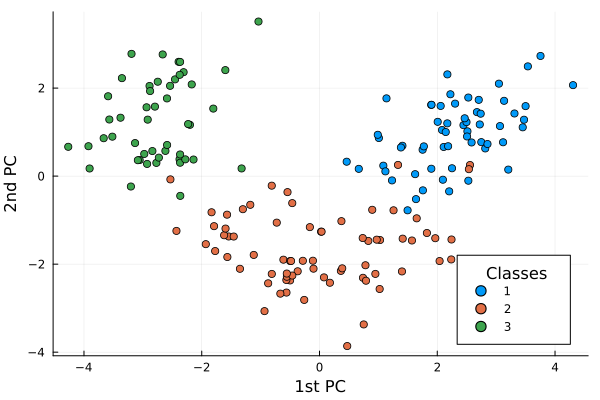

In [36]:
# now generate projection
xprj = w1' * (X1 .- m1)
yprj = w2' * (X1 .- m1)
proj = vcat(xprj, yprj)  
scatter(proj[1, :], proj[2, :], group = y, legendtitle="Classes", legend=:bottomright, xlabel="1st PC", ylabel="2nd PC")